### Student Information
Name: 林鈺洋

Student ID: 114033638

GitHub ID: yuyanglin114

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [34]:
### Begin Assignment Here

In [36]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

d:\GitHub\Data Mining\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


# Data Preparation

In [39]:
dataset=pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
#dataset[0:5]
# len(dataset)
# dataset.text
dataset.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [40]:
# categories
categories = ['type', 'datetime', 'title', 'author', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label']

data=dataset[categories]
data[:10]

,type,datetime,title,author,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
6,comment,2025-04-11 12:37:23,Is the market in complete denial right now?,stoniey84,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
7,comment,2025-04-11 17:28:50,Retardation is on the menu boys! WSB is so back,OSRSkarma,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,"It's fucking awful seeing the ""Silver"" misinfo...",Blondbox,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0
9,comment,2021-12-31 16:29:49,Any cheap stocks under $10?,Zumuru,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,"['HLGN', 'Hurry', 'moon']",1.0


# Exercises

### Exercise 1 — Show 3 samples

In [41]:
data[['title','author','subjectivity']].head(3) if set(['title','author','subjectivity']).issubset(data.columns) else data.head(3)

,title,author,subjectivity
0,Retardation is on the menu boys! WSB is so back,StickyTip420,1.000000
1,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,0.177778
2,How do you feel about a sitting president maki...,Btankersly66,0.000000


### Exercise 2 — Other querying techniques

In [42]:

# Boolean filter + string contains + head
q1 = data[data.get('subjectivity', pd.Series([np.nan]*len(data))).fillna(0) > 0.5].head(5)
# Query every 7th post of type 'post' if available
q2 = data[(data.get('type','')=='post')].iloc[::7].head(5)
# Contains keyword (case-insensitive) in text/title
key = 'earnings'
q3 = data[data['text'].str.contains(key, case=False, na=False)].head(5) if 'text' in data else pd.DataFrame()
display(q1); display(q2); display(q3)


,type,datetime,title,author,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
3,post,2023-08-30 17:12:55,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
7,comment,2025-04-11 17:28:50,Retardation is on the menu boys! WSB is so back,OSRSkarma,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
12,comment,2025-04-11 5:55:28,U.S. 10-year Treasury yields rise as Trump tar...,JBallMan23,"Honestly let the economy burn, maybe people wi...",0.900000,0.600000,1.0,"['burn', 'economy']",-1.0
13,comment,2025-03-04 23:49:37,Rate My Portfolio - r/Stocks Quarterly Thread ...,Miramarmechanic,"\r\nI’ve been doing pretty good with this, but...",0.513333,0.116667,1.0,"['Tltw', 'Brkb', 'Upro', 'Msci/Nvda', 't', '%'...",0.0


,type,datetime,title,author,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
158,post,2022-02-27 14:56:07,What will happen with 2022?,Superb_Nebula8800,Investors brace for more volatility as the wes...,0.000000,0.000000,0.0,"['Russia', 'west', 'access', 'volatility', 'Sw...",0.0
192,post,2025-03-21 21:15:20,Commitment of Trader Report,saasfin,"Summarized with Highlights, updated weekly be ...",0.000000,0.000000,0.0,"[']', 'Highlights', 'Report', 'EOW', 'Summary'...",0.0
349,post,2025-03-22 18:14:30,FINRA Daily Shorts Data,saasfin,Updated Daily by EOD\r\n\r\n \r\n[Daily Short...,0.100000,0.000000,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0
404,post,2025-03-24 11:28:08,What are you buying (or avoiding) if this down...,mm_newsletter,The stock market is wobbling. Big indexes like...,0.605556,-0.239815,-1.0,"['P', 'plague', 'Nasdaq', 'Money Machine Newsl...",-1.0


,type,datetime,title,author,text,subjectivity,polarity,sentiment,entities,label
6,comment,2025-04-11 12:37:23,Is the market in complete denial right now?,stoniey84,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
48,post,2025-04-02 13:00:42,Earnings for current week,saasfin,\r\n\r\n [MarketWatch: Stock Market News - Fi...,0.000000,0.000000,0.0,"['Stock', 'MarketWatch', 'catalyst', 'stockbuy...",0.0
63,post,2025-03-01 10:00:42,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
351,post,2025-03-26 20:36:21,"Today’s stock winners and losers - GameStop, N...",Sheguey-vara,# Stock winners\r\n\r\n\r\n\r\n**11.65% GameSt...,0.412612,0.089587,1.0,"['IBD', 'core', 'Canada', 'brand', 'Sherwood',...",0.0
383,comment,2021-02-12 1:28:20,#AUY Yamana Gold Inc! Undervalued 📈🚀,DarkLight34,it never seems to go up even with great earnings,0.750000,0.800000,1.0,[],-1.0


### Exercise 3 — Fetch records of a type & sample every 10th; show first 5

In [43]:
data[data.get('type','').eq('post')].iloc[::10].head(5)

,type,datetime,title,author,text,subjectivity,polarity,sentiment,entities,label
3,post,2023-08-30 17:12:55,Who knows more? $VMAR,emiljenfn,Vision Marine Technologies Inc. is rewriting t...,0.64697,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
165,post,2025-04-09 14:01:01,Established Uptrend,AutoModerator,Stock list generated from technical Analysis. ...,0.10000,0.000000,0.0,"['SMA', 'ta_rsi_nob60', 'ft=2', 'stockbuyvest....",0.0
332,post,2025-04-11 18:25:25,$75k+ In Gains (300% YTD),KatBoss01,"Mostly in MSTR calls, AAPL puts and GBTC long.",0.45000,0.225000,1.0,"['GBTC', 'MSTR', 'AAPL']",1.0
421,post,2025-03-31 14:05:30,Stock Gainers for Today,saasfin,Stocks that are trending up today\r\n\r\n [Pop...,0.00000,0.000000,0.0,"[']', 'Popping', 'stockbuyvest.com', 'today']",0.0
487,post,2021-12-25 0:40:59,Deep value vs Dividend!,AnonymusFarmer,"Good Morning Investors, \r\n\r\nI am a young F...",0.41903,0.119152,1.0,"['student', 'someone', 'x200B', 'dividend', 'w...",0.0


### Exercise 4 — Check missing values (axis parameter)

In [44]:

# Column-wise missing ratio
col_na = data.isna().mean().sort_values(ascending=False)
# Row-wise: how many missing per row
row_na = data.isna().sum(axis=1).value_counts().sort_index()
display(col_na.to_frame('na_ratio'), row_na.to_frame('rows_with_k_missing'))


,na_ratio
type,0.0
datetime,0.0
title,0.0
author,0.0
text,0.0
subjectivity,0.0
polarity,0.0
sentiment,0.0
entities,0.0
label,0.0


,rows_with_k_missing
0,847


### Exercise 5 — Why `.isnull()` may miss things; robust missing detection

In [45]:

# Some datasets encode 'missing' as empty strings or 'N/A' tokens
tokens = {'', 'na', 'n/a', 'null', 'none', 'nan'}
def is_missing_like(s):
    if pd.isna(s): return True
    if isinstance(s,str) and s.strip().lower() in tokens: return True
    return False

miss_like = data.applymap(is_missing_like)
display(miss_like.sum().sort_values(ascending=False).to_frame('missing_like_count'))


C:\Users\user\AppData\Local\Temp\ipykernel_18508\2125416417.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  miss_like = data.applymap(is_missing_like)


,missing_like_count
type,0
datetime,0
title,0
author,0
text,0
subjectivity,0
polarity,0
sentiment,0
entities,0
label,0


### Exercise 6 — Re-check after cleaning

In [46]:

# Example cleaning: standardize missing-like to NaN in 'author' and 'title'
for col in [c for c in ['author','title'] if c in data.columns]:
    data[col] = data[col].apply(lambda s: (np.nan if is_missing_like(s) else s))
display(data.isna().mean().sort_values(ascending=False).to_frame('na_ratio_after_clean'))


C:\Users\user\AppData\Local\Temp\ipykernel_18508\2605003399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda s: (np.nan if is_missing_like(s) else s))


,na_ratio_after_clean
type,0.0
datetime,0.0
title,0.0
author,0.0
text,0.0
subjectivity,0.0
polarity,0.0
sentiment,0.0
entities,0.0
label,0.0


### Exercise 7 — Category distribution bar chart (add y-label)

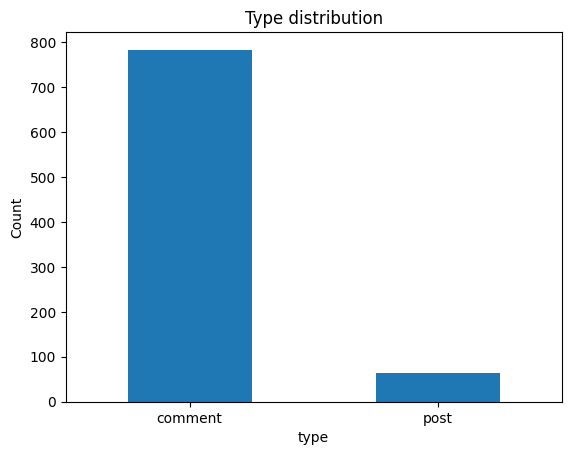

In [47]:

vc = data.get('type', pd.Series(dtype=object)).value_counts()
ax = vc.plot(kind='bar', rot=0, title='Type distribution'); ax.set_ylabel('Count'); plt.show()


### Exercise 8 — Side-by-side: full vs sample distribution

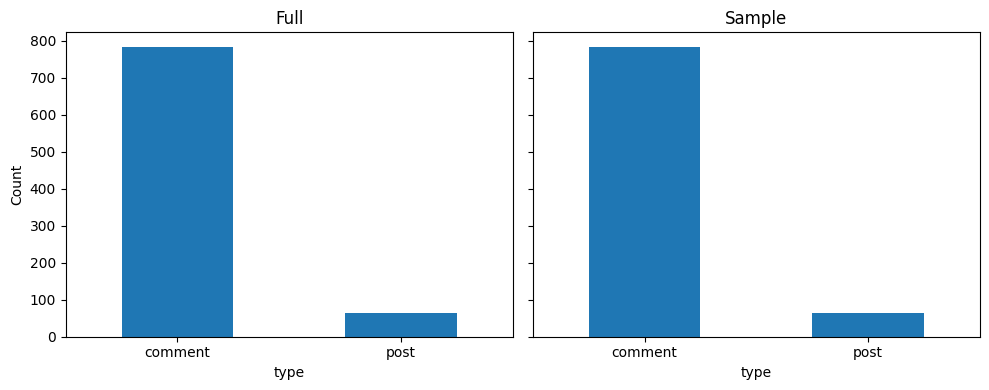

In [48]:

sample = data.sample(min(1000, len(data)), random_state=0) if len(data)>0 else data
vc_full = data.get('type', pd.Series(dtype=object)).value_counts()
vc_samp = sample.get('type', pd.Series(dtype=object)).value_counts()
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True)
vc_full.plot(kind='bar', ax=axes[0], rot=0, title='Full'); axes[0].set_ylabel('Count')
vc_samp.plot(kind='bar', ax=axes[1], rot=0, title='Sample')
plt.tight_layout(); plt.show()


### Setup for Exercises 9–15 — Build term–document matrices on `text`

In [49]:

texts = data['text'].astype(str).tolist()
count_vect = CountVectorizer(stop_words='english', max_features=5000)
X_counts = count_vect.fit_transform(texts)
feature_names = count_vect.get_feature_names_out()
print('X_counts shape:', X_counts.shape, '| nnz:', X_counts.nnz)


X_counts shape: (847, 4105) | nnz: 9906


### Exercise 9 — Analyze the first document’s tokens

In [50]:

analyze = count_vect.build_analyzer()
tokens0 = analyze(texts[0]) if len(texts)>0 else []
print('First doc token count:', len(tokens0))
print(tokens0[:50])


First doc token count: 2
['calls', 'retards']


### Exercise 10 — Map nonzeros in 5th doc to vocabulary (word→count)

In [51]:

row = X_counts[4] if X_counts.shape[0] >= 5 else X_counts[0]
word_counts = dict(zip(feature_names[row.indices], row.data))
word_counts


{'didn': np.int64(1), 'say': np.int64(1), 'thank': np.int64(1)}

### Exercise 11 — Efficient sparsity visualization + informative block heatmap

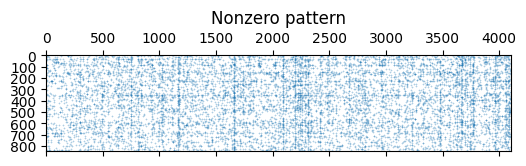

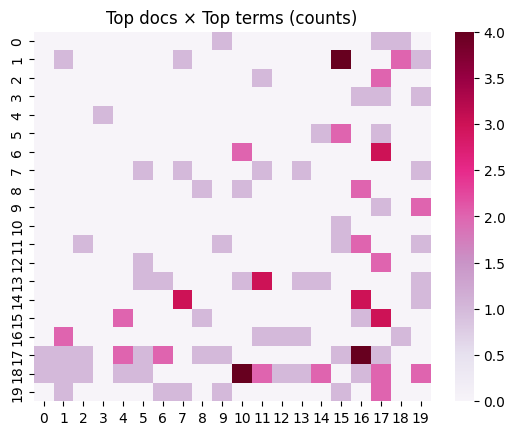

In [52]:

from scipy import sparse
X_csr = X_counts.tocsr()
# Global pattern (cheap)
plt.figure(figsize=(6,4)); plt.spy(X_csr, markersize=0.1); plt.title('Nonzero pattern'); plt.show()
# Informative block
df_terms = np.asarray((X_csr>0).sum(axis=0)).ravel()
rows = np.argsort(np.diff(X_csr.indptr))[-20:]
cols = np.argsort(df_terms)[-20:]
block = X_csr[rows][:, cols].toarray()
import seaborn as sns
sns.heatmap(block, cmap='PuRd'); plt.title('Top docs × Top terms (counts)'); plt.show()


### Exercise 12 — Interactive Plotly (bar + heatmap)

In [53]:

try:
    import plotly.express as px
    X_csr = X_counts.tocsr()
    df_terms = np.asarray((X_csr>0).sum(axis=0)).ravel()
    N=40; top = df_terms.argsort()[-N:][::-1]
    fig1 = px.bar(x=feature_names[top], y=df_terms[top], labels={'x':'term','y':'doc freq'},
                  title=f'Top-{N} terms by DF'); fig1.update_layout(xaxis_tickangle=60); fig1.show()
    rows = np.argsort(np.diff(X_csr.indptr))[-30:]
    block = X_csr[rows][:, top].toarray()
    fig2 = px.imshow(block, x=feature_names[top], y=[f'doc_{i}' for i in rows],
                     color_continuous_scale='PuRd', labels=dict(x='term',y='doc',color='count'),
                     title='Counts heatmap — Top docs × Top terms'); fig2.show()
except Exception as e:
    print('Plotly not available:', e)


### Exercise 13 — Parametric top-terms visualization (tf/df, with filtering)

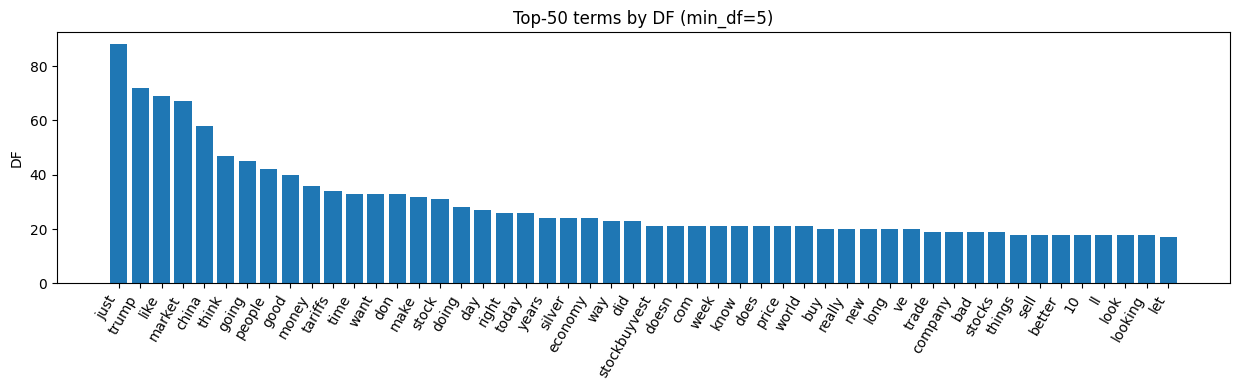

In [54]:

tf = np.asarray(X_counts.sum(axis=0)).ravel()
df = np.asarray((X_counts>0).sum(axis=0)).ravel()
metric='df'; N=50; min_df=5
scores = df if metric=='df' else tf
keep = np.where(df>=min_df)[0]
top = keep[np.argsort(scores[keep])[-N:][::-1]]
plt.figure(figsize=(max(10, N*0.25), 4))
plt.bar(feature_names[top], scores[top]); plt.xticks(rotation=60, ha='right')
plt.title(f'Top-{len(top)} terms by {metric.upper()} (min_df={min_df})'); plt.ylabel(metric.upper())
plt.tight_layout(); plt.show()


### Exercise 14 — Sort x-axis by frequency to show long tail

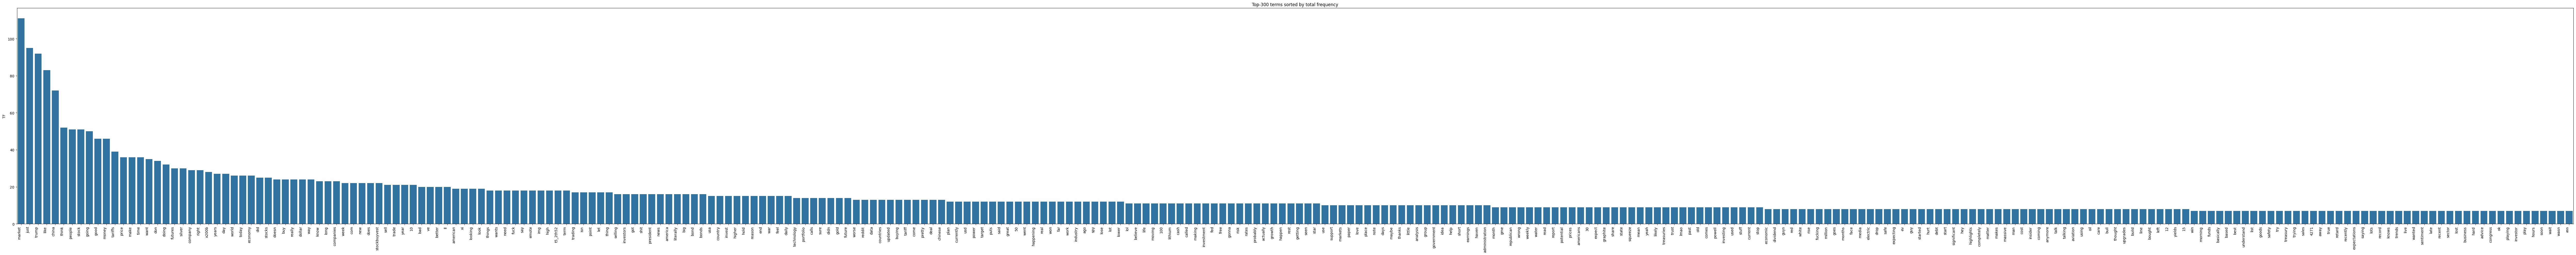

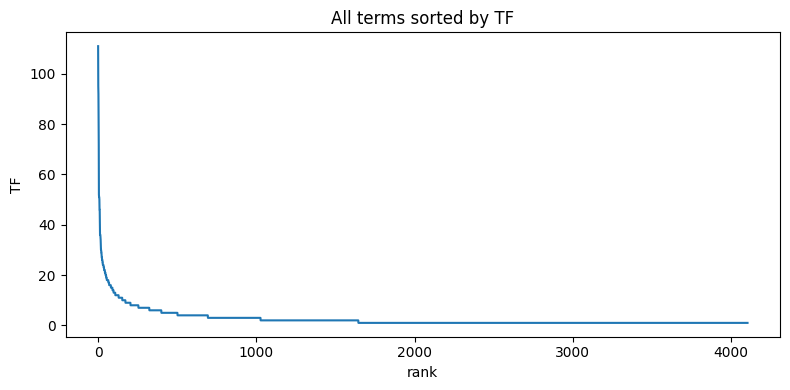

In [55]:

order = np.argsort(tf)[::-1]
K = min(300, len(feature_names)); idx = order[:K]
plt.figure(figsize=(100,10))
sns.barplot(x=feature_names[idx], y=tf[idx]); plt.xticks(rotation=90, ha='right')
plt.title(f'Top-{K} terms sorted by total frequency'); plt.ylabel('TF'); plt.tight_layout(); plt.show()
plt.figure(figsize=(8,4)); plt.plot(tf[order]); plt.title('All terms sorted by TF'); plt.xlabel('rank'); plt.ylabel('TF'); plt.tight_layout(); plt.show()


### Exercise 15 — Log distribution view

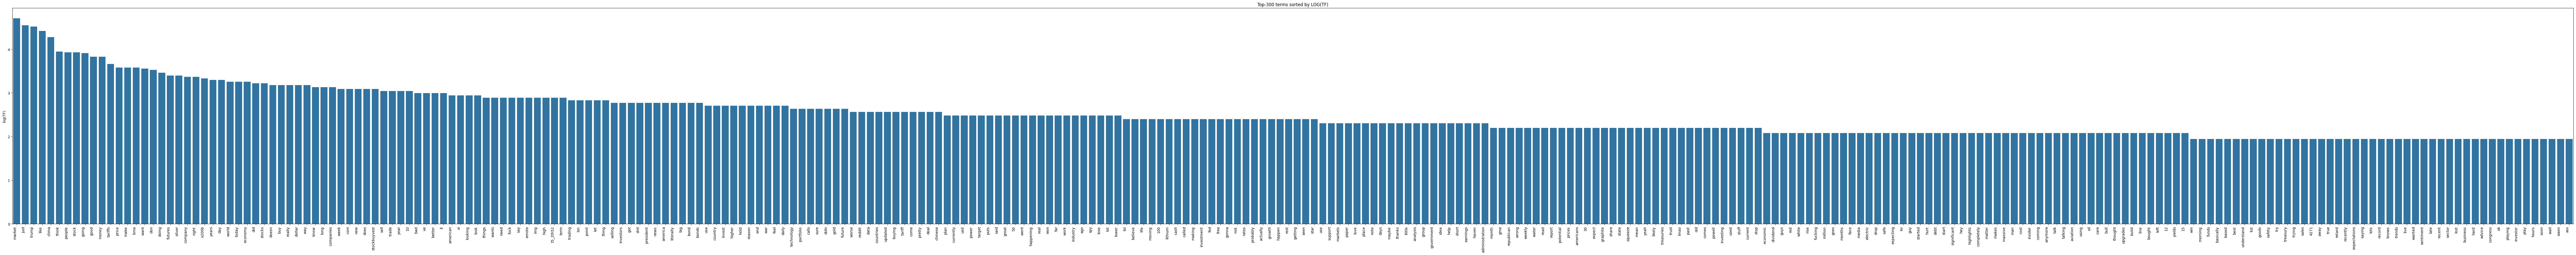

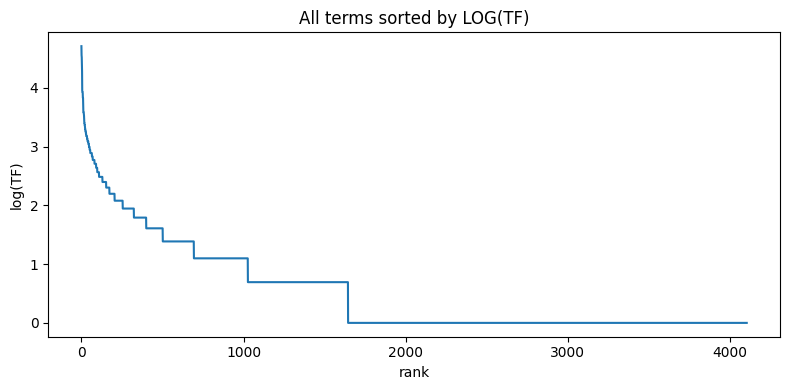

In [56]:

tf_log = np.log(tf + 1e-9)  # safe log
order_log = np.argsort(tf_log)[::-1]
K = min(300, len(feature_names)); idx = order_log[:K]
plt.figure(figsize=(100,10))
sns.barplot(x=feature_names[idx], y=tf_log[idx]); plt.xticks(rotation=90, ha='right')
plt.title(f'Top-{K} terms sorted by LOG(TF)'); plt.ylabel('log(TF)'); plt.tight_layout(); plt.show()
plt.figure(figsize=(8,4)); plt.plot(tf_log[order_log]); plt.title('All terms sorted by LOG(TF)'); plt.xlabel('rank'); plt.ylabel('log(TF)'); plt.tight_layout(); plt.show()


# Phase 2

In [57]:
### Begin Assignment Here